In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [4]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL13FE4', 'AL5FE4', 'FCC_A1', 'B2_BCC']

In [5]:
%time eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): 0.2, v.T: 1400, v.P:101325})
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4

INFO (theano.gof.compilelock): Waiting for existing lock by process '19372' (I am process '19181')
INFO:theano.gof.compilelock:Waiting for existing lock by process '19372' (I am process '19181')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/rotis/.theano/compiledir_Linux-4.1-gentoo-x86_64-Intel-R-_Core-TM-_i7-4700MQ_CPU_@_2.40GHz-with-gentoo-2.2-Intel_R_Core_TM_i7-4700MQ_CPU_@_2.40GHz-3.4.3-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/rotis/.theano/compiledir_Linux-4.1-gentoo-x86_64-Intel-R-_Core-TM-_i7-4700MQ_CPU_@_2.40GHz-with-gentoo-2.2-Intel_R_Core_TM_i7-4700MQ_CPU_@_2.40GHz-3.4.3-64/lock_dir


 B2_BCC

INFO (theano.gof.compilelock): Waiting for existing lock by process '19372' (I am process '19181')
INFO:theano.gof.compilelock:Waiting for existing lock by process '19372' (I am process '19181')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/rotis/.theano/compiledir_Linux-4.1-gentoo-x86_64-Intel-R-_Core-TM-_i7-4700MQ_CPU_@_2.40GHz-with-gentoo-2.2-Intel_R_Core_TM_i7-4700MQ_CPU_@_2.40GHz-3.4.3-64/lock_dir
INFO:theano.gof.compilelock:To manually release the lock, delete /home/rotis/.theano/compiledir_Linux-4.1-gentoo-x86_64-Intel-R-_Core-TM-_i7-4700MQ_CPU_@_2.40GHz-with-gentoo-2.2-Intel_R_Core_TM_i7-4700MQ_CPU_@_2.40GHz-3.4.3-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '19372' (I am process '19181')
INFO:theano.gof.compilelock:Waiting for existing lock by process '19372' (I am process '19181')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/rotis/.theano/compiledir_Linux-4.1-gentoo-x86_64-Intel-R-_Cor

 FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [100 points, 10.1KB]
Computing convex hull [iteration 1]
progress 134475.96819089548
Refining convex hull
Rebuilding grid [112 points, 11.3KB]
Computing convex hull [iteration 2]
progress 531.3481817996362
Refining convex hull
Rebuilding grid [124 points, 12.5KB]
Computing convex hull [iteration 3]
progress 2241.9416968869627
Refining convex hull
Rebuilding grid [136 points, 13.7KB]
Computing convex hull [iteration 4]
progress 931.9538034519646
Refining convex hull
Rebuilding grid [148 points, 14.9KB]
Computing convex hull [iteration 5]
progress 0.0
Convergence achieved
CPU times: user 4min 27s, sys: 1.44 s, total: 4min 28s
Wall time: 8min 6s
<xray.Dataset>
Dimensions:       (P: 1, T: 1, X_AL: 1, component: 2, internal_dof: 5, vertex: 2)
Coordinates:
  * P             (P) float64 1.013e+05
  * T             (T) float64 1.4e+03
  * X_AL          (X_AL) float64 0.2
  * vertex        (vertex) int64 0 1
  * component     (component) objec

KeyError: 1300.0

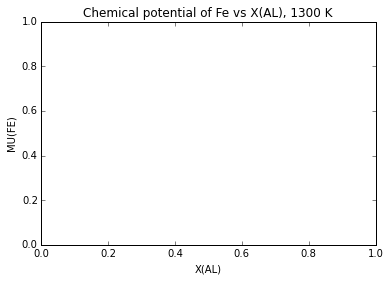

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1300 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p.values)] for p in eq.Phase.sel(T=1300, P=101325, vertex=0)]
plt.scatter(eq.X.sel(T=1300, P=101325, component='AL', vertex=0), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p.values)] for p in eq.Phase.sel(T=1400, P=101325, vertex=1)]
plt.scatter(eq.X.sel(T=1300, P=101325, component='AL', vertex=1), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')

In [7]:
%%time
eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe,
    {v.X('AL'): 0.2, v.T: (300, 1400, 100)})
print(eq)

Components: AL FE VA
Phases: B2_BCC [done]
Computing initial grid 

TypeError: cannot determine truth value of
148.95983712395 >= 5.48016386444919e-97*P**3 - 30493.8860189576

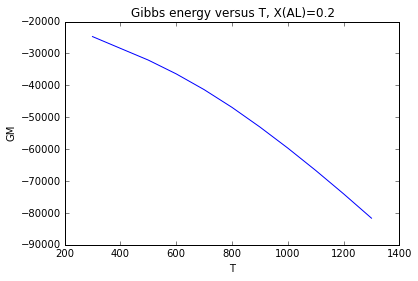

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gca().set_title('Gibbs energy versus T, X(AL)=0.2')
plt.gca().set_xlabel('T')
plt.gca().set_ylabel('GM')
plt.plot(eq['T'], eq.GM.sel(X_AL=0.2))